# Data Visualization

## I - Loading the data

In [1]:
# Import of librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import of dataset of website transaction
# df = pd.read_csv("/home/exalis/VELIB-DATA/consolidated_dataset_2020_01_16.csv")
df = pd.read_csv("/home/exalis/VELIB-DATA/2020_01_15/2020_01_15_09:30:01.csv", sep="%")

## II - Data structure of the dataframe

In [9]:
# First exploration

print('Shape:')
print(df.shape)
print()
print('Variable description:')
print(df.info())
print()
print('Head:')
print(df.head())
print()
print('Description:')
print(df.describe(include='all'))
print('Missing values:')
print()
print(df.isna().sum())
print()
print('Count of different values:')
for i in range(len(df.columns)):
    print(df.columns[i],':',len(df[df.columns[i]].unique()))

Shape:
(1393, 21)

Variable description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
Nombre de bornes disponibles      1393 non-null int64
Nombre vélo en PARK+              1393 non-null int64
Nombres de bornes en station      1393 non-null int64
PARK + activation                 1393 non-null object
densityLevel                      1393 non-null int64
Achat possible en station (CB)    1393 non-null object
Description station               1393 non-null object
maxBikeOverflow                   1393 non-null int64
Etat du Totem                     1393 non-null object
nbFreeDock                        1393 non-null int64
Nombre de vélo mécanique          1393 non-null int64
PARK +                            1393 non-null object
nbDock                            1393 non-null int64
Nombre vélo électrique            1393 non-null int64
Nombre vélo en PARK+.1            1393 non-null int64
Code de la station                139

In [26]:
# Analysis of each column structuration

for i in range(len(df.columns)):
    print(df.columns[i],":" )
    print()
    print(round(df[df.columns[i]].value_counts()/df.shape[0]*100,1))
    print()
    print("----------------------------")

Nombre de bornes disponibles :

0     14.6
17     3.7
21     3.6
22     3.3
1      3.2
      ... 
63     0.1
62     0.1
68     0.1
67     0.1
69     0.1
Name: Nombre de bornes disponibles, Length: 68, dtype: float64

----------------------------
Nombre vélo en PARK+ :

0    99.4
1     0.6
2     0.1
Name: Nombre vélo en PARK+, dtype: float64

----------------------------
Nombres de bornes en station :

0     12.9
30     4.7
20     4.7
24     3.9
25     3.9
      ... 
6      0.1
4      0.1
71     0.1
69     0.1
73     0.1
Name: Nombres de bornes en station, Length: 70, dtype: float64

----------------------------
PARK + activation :

no    100.0
Name: PARK + activation, dtype: float64

----------------------------
densityLevel :

1    90.4
0     9.6
Name: densityLevel, dtype: float64

----------------------------
Achat possible en station (CB) :

yes    55.3
no     44.7
Name: Achat possible en station (CB), dtype: float64

----------------------------
Description station :

{"code": "180

## III - Data visualisation and futher analyses

In [29]:
for i in range(len(df.columns)):
    print(df.columns[i])

Nombre de bornes disponibles
Nombre vélo en PARK+
Nombres de bornes en station
PARK + activation
densityLevel
Achat possible en station (CB)
Description station
maxBikeOverflow
Etat du Totem
nbFreeDock
Nombre de vélo mécanique
PARK +
nbDock
Nombre vélo électrique
Nombre vélo en PARK+.1
Code de la station
Nom de la station
Etat des stations
Type de stations
geo
duedate


#### 1 - Age

C:\Users\alexi\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


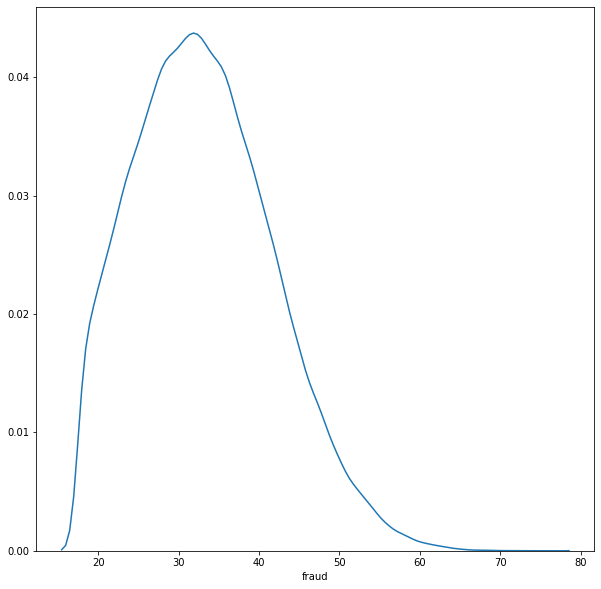

In [537]:
# Visualisation of age

fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['age'],ax=ax,axlabel='all',hist=False)
sns.distplot(df[df['class']=='1']['age'],ax=ax,axlabel='fraud',color='red',hist=False)
sns.distplot(df[df['class']=='0']['age'],ax=ax,axlabel='fraud',color='green',hist=False)
plt.show()

#####  Impact of age on fraud: 

In red, the fraud age distribution, in green no fraud, in blue fraud and no fraud.

Age does not seem to be correlated with fraud. Some figures seem to be overrepresented. A clue would be that fraud with quick signup and purchase have the same infos, including age.

#### 2 - Purchase value analysis

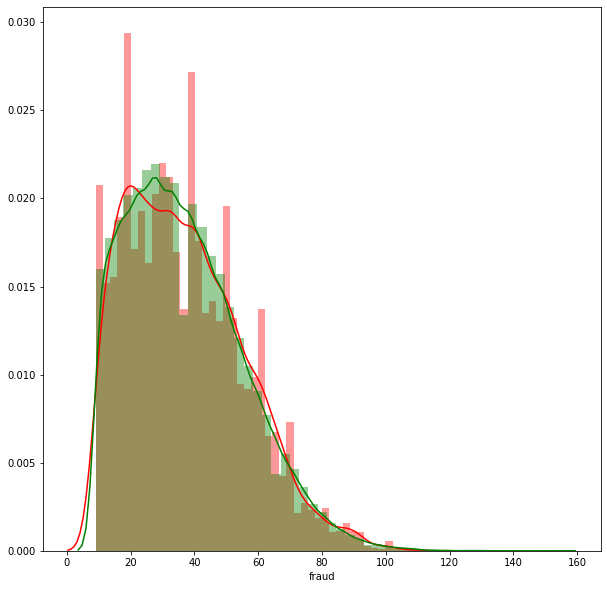

In [538]:
# Visualisation of purchase value for a fraud
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df[df['class']==1]['purchase_value'],ax=ax,axlabel='fraud',color='red')
sns.distplot(df[df['class']==0]['purchase_value'],ax=ax,axlabel='fraud',color='green')
plt.show()

We see here that purchase amounts are not that interesting to understand the risk of fraud

#### 3 - Country analysis

#### 4  - Time Analysis

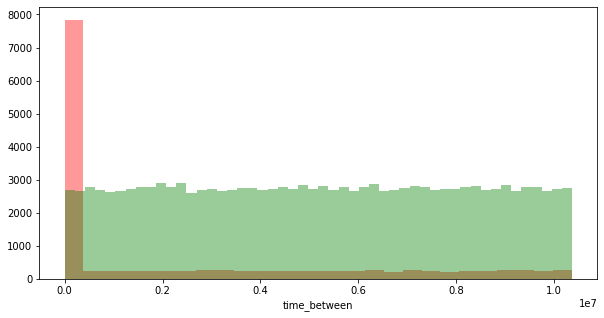

In [280]:
# dist1 is the second with class = 1, dist2 is with class ) 0

dist1 = pd.DataFrame(df[df['class']==1][['time_between','class']]).sort_values(by='time_between')
dist2 = pd.DataFrame(df[df['class']==0][['time_between','class']]).sort_values(by='time_between')

# Creation of a plot

fig, axis = plt.subplots(figsize=(10,5))
sns.distplot(dist1['time_between'],ax=axis,hist=True,color="red",kde=False)
sns.distplot(dist2['time_between'],ax=axis,hist=True,color="green",kde=False)

plt.show()


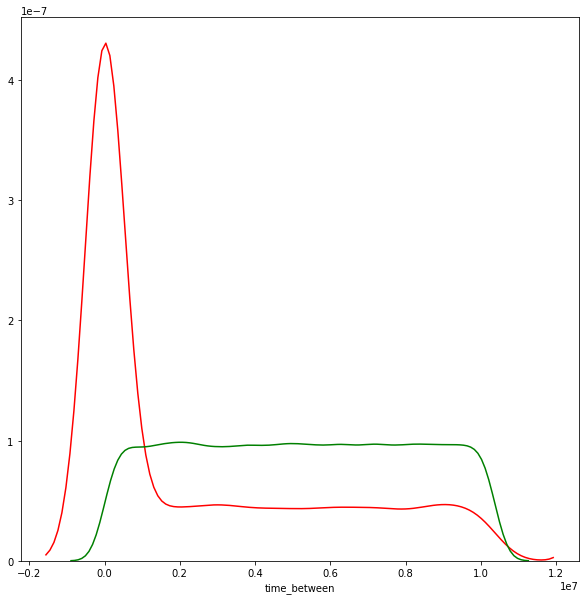

In [281]:
# dist1 is the second with class = 1, dist2 is with class ) 0

dist1 = pd.DataFrame(df[df['class']==1][['time_between','class']]).sort_values(by='time_between')
dist2 = pd.DataFrame(df[df['class']==0][['time_between','class']]).sort_values(by='time_between')

# Creation of a plot

fig, axis = plt.subplots(figsize=(10,10))
sns.distplot(dist1['time_between'],ax=axis,hist=False,color="red",kde=True)
sns.distplot(dist2['time_between'],ax=axis,hist=False,color="green",kde=True)
plt.show()


### Data Analysis:

Global comments: no missing values other the lines. 1393 lines, 21 columns.

Detail analysis:
- Nombre de bornes disponibles
- Nombre vélo en PARK+
- Nombres de bornes en station
- PARK + activation

densityLevel

Achat possible en station (CB)

Description station

maxBikeOverflow

Etat du Totem

nbFreeDock

Nombre de vélo mécanique

PARK +

nbDock

Nombre vélo électrique

Nombre vélo en PARK+.1

Code de la station

Nom de la station

Etat des stations

Type de stations

geo : GPS coordinates. All are differents, which is logical. 

duedate